In [1]:
from google.colab import files
files.upload()

Saving banana_quality.csv to banana_quality.csv


{'banana_quality.csv': b'Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality\n-1.9249682,0.46807805,3.0778325,-1.4721768,0.2947986,2.4355695,0.27129033,Good\n-2.4097514,0.48686993,0.34692144,-2.4950993,-0.8922133,2.0675488,0.30732512,Good\n-0.3576066,1.4831762,1.5684522,-2.6451454,-0.64726734,3.0906434,1.427322,Good\n-0.8685235,1.5662014,1.8896049,-1.2737614,-1.0062776,1.8730015,0.47786173,Good\n0.65182525,1.3191992,-0.022458995,-1.2097088,-1.430692,1.0783454,2.8124418,Good\n-2.8077223,1.1381357,3.4476268,-1.7133021,-2.2209115,2.07941,2.2812028,Good\n-0.23020804,2.7834713,1.6811839,-0.52977854,-1.9584678,1.3481431,2.1817663,Good\n-1.3485153,3.2322812,4.0118165,-0.89060634,-0.031993963,2.3959174,1.0428779,Good\n-2.0122256,1.9280338,0.69874644,-0.95977193,-1.3497207,1.3118018,1.048762,Good\n0.05303478,1.3099926,-0.26413944,-2.9692972,0.30398348,3.8893588,1.9313319,Good\n-1.5878931,1.4466584,0.13883868,-2.8589776,-1.7612225,2.4337273,1.7631273,Good\n-2.0318587,1.3767682,2.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load dataset

df = pd.read_csv('banana_quality.csv')

In [13]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         8000 non-null   float64
 1   Weight       8000 non-null   float64
 2   Sweetness    8000 non-null   float64
 3   Softness     8000 non-null   float64
 4   HarvestTime  8000 non-null   float64
 5   Ripeness     8000 non-null   float64
 6   Acidity      8000 non-null   float64
 7   Quality      8000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 562.5+ KB


In [4]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values if any, for example, with the median or mean
df.fillna(df.median(), inplace=True)

# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates if any
df = df.drop_duplicates()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64
0


<ipython-input-4-ad318938aed5>:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


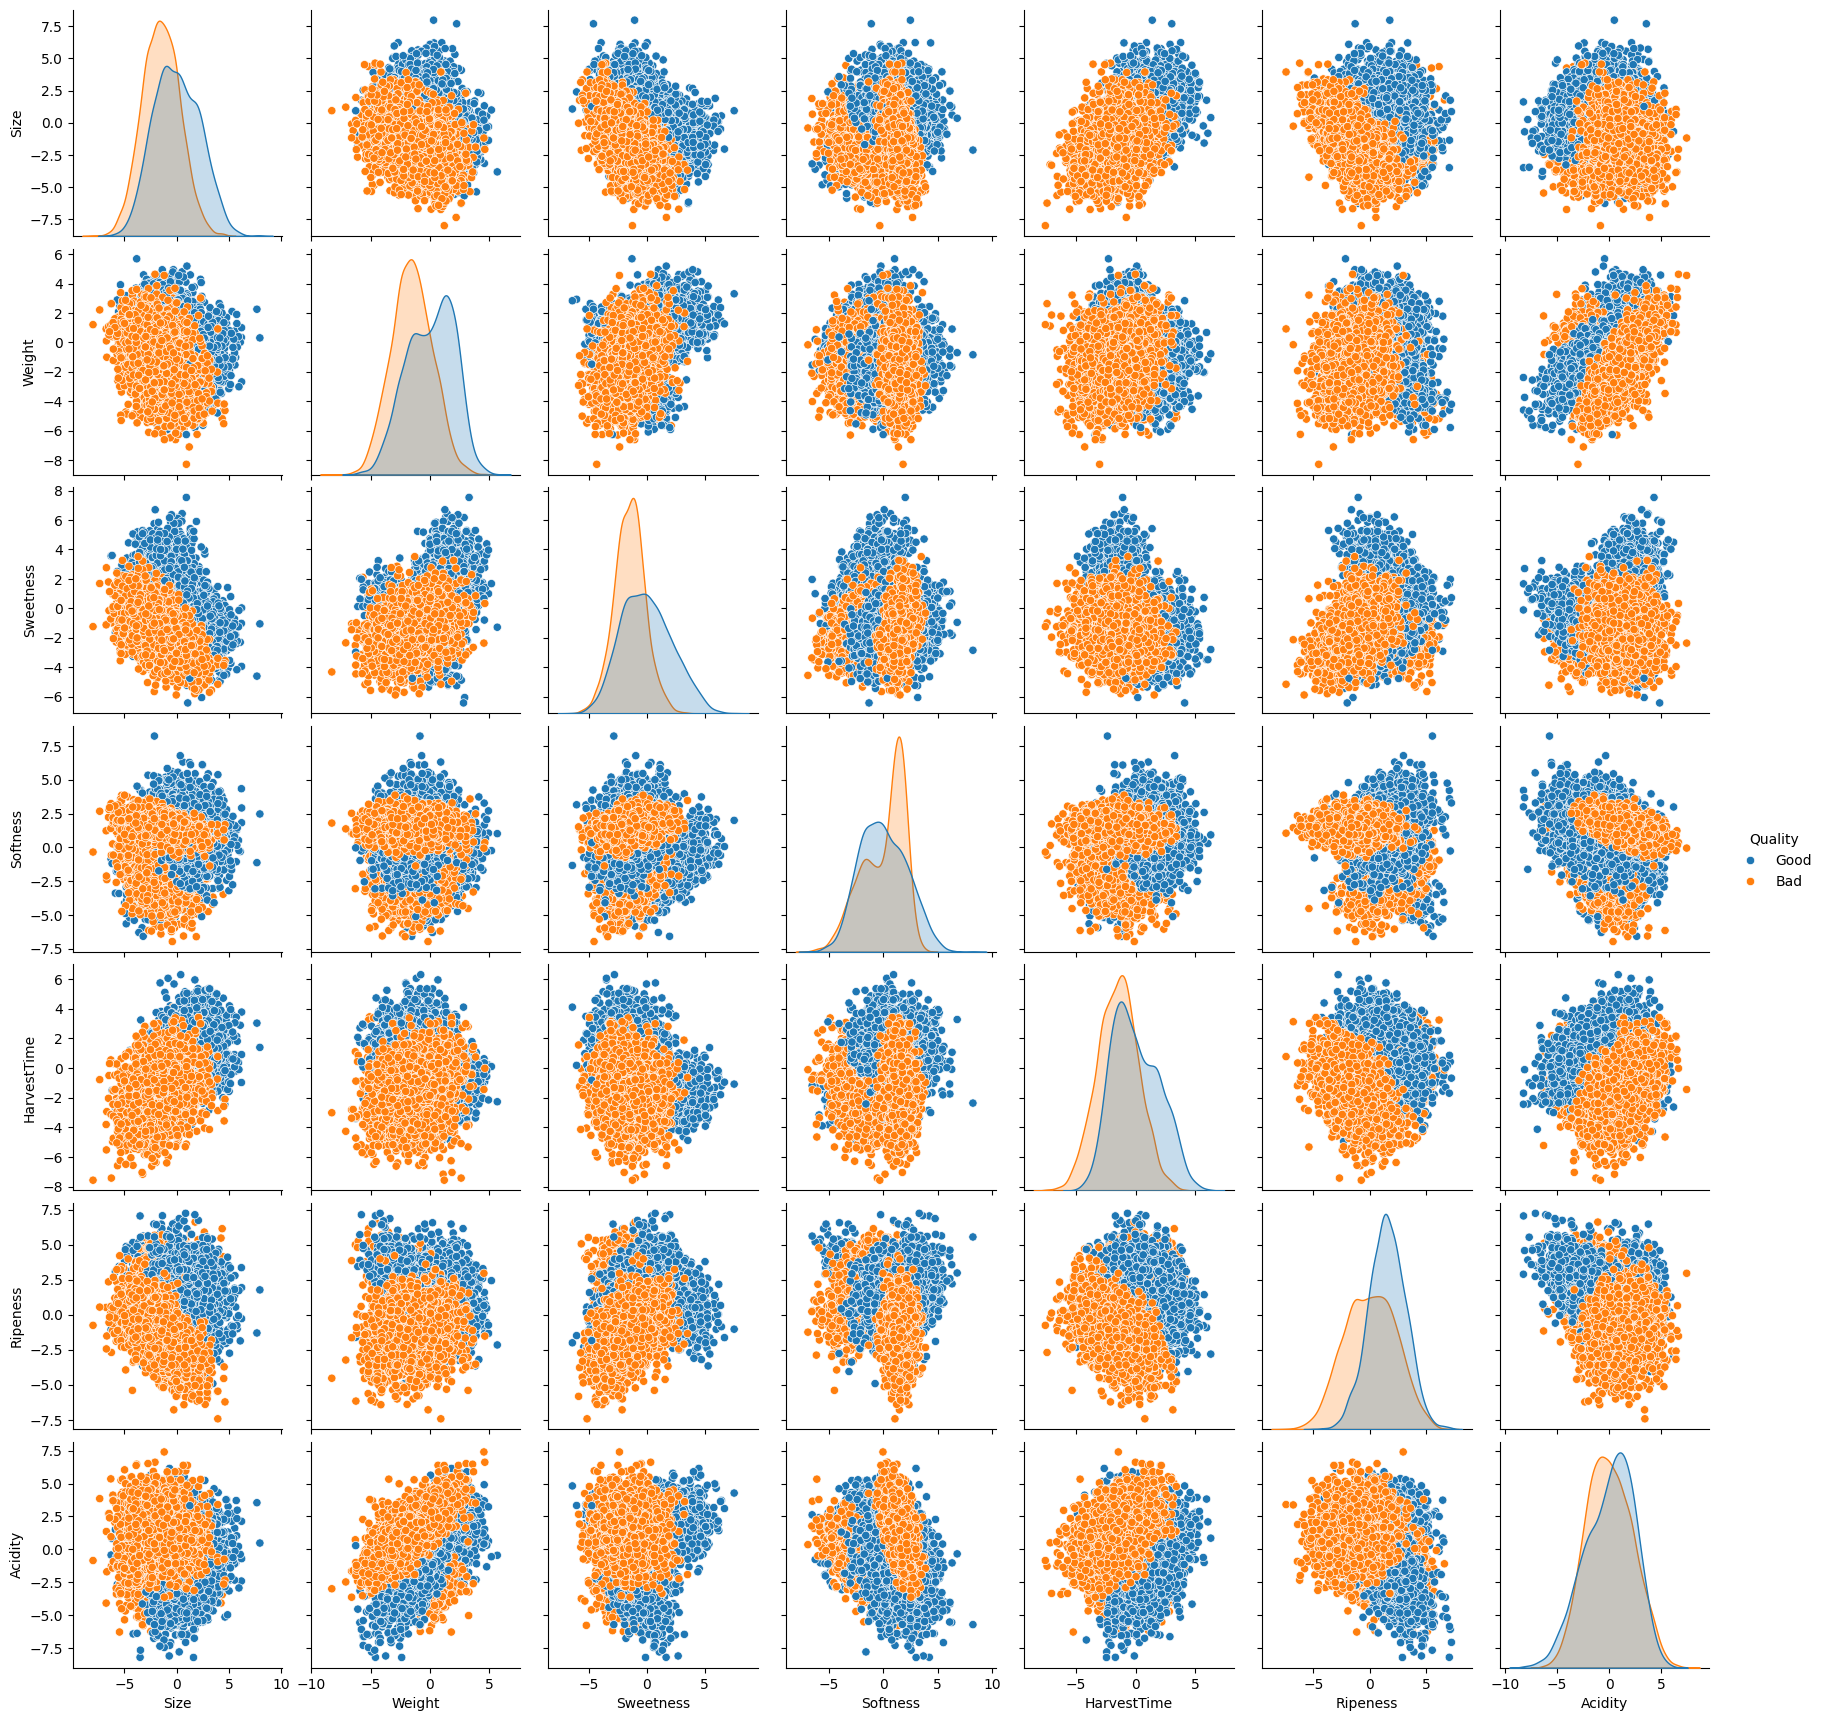

In [6]:
# Pairplot to visualize the relationships
sns.pairplot(df, hue='Quality')
plt.show()


<ipython-input-7-12bf2ddacf8e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


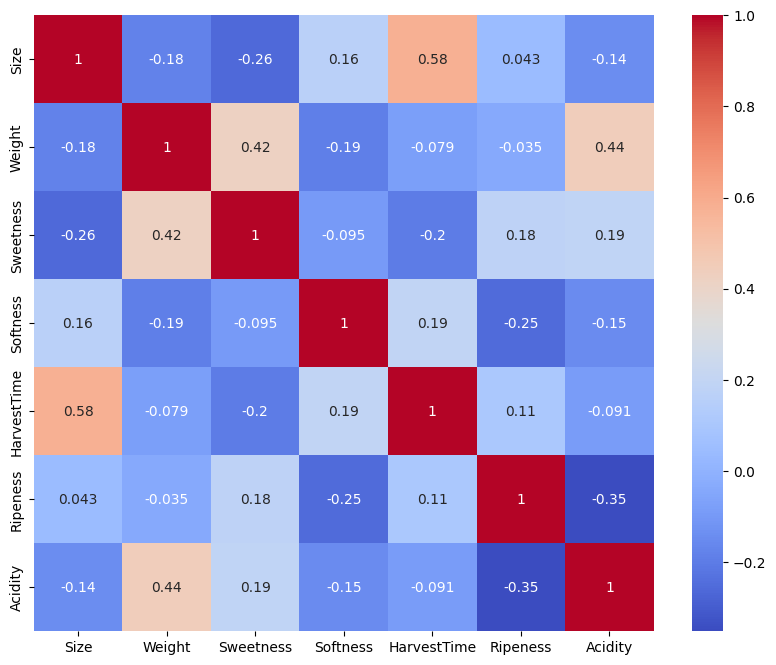

In [7]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [8]:
# Assuming all features are relevant, separate features and target
X = df.drop('Quality', axis=1)
y = df['Quality']

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
# Initialize and train the RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

[[759  22]
 [ 18 801]]
              precision    recall  f1-score   support

         Bad       0.98      0.97      0.97       781
        Good       0.97      0.98      0.98       819

    accuracy                           0.97      1600
   macro avg       0.98      0.97      0.97      1600
weighted avg       0.98      0.97      0.97      1600

Accuracy Score: 0.975


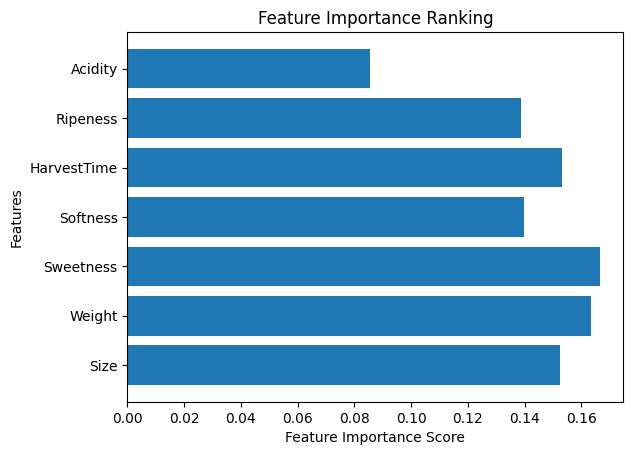

In [12]:
# Feature importance
feature_importance = model.feature_importances_
features = df.drop('Quality', axis=1).columns
plt.barh(features, feature_importance)
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance Ranking")
plt.show()
